In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# 定义输入层大小、隐藏层大小、输出层大小和批量大小
n_in, n_h, n_out, batch_size = 10, 5, 1, 10

In [5]:
# 创建虚拟输入数据和目标数据
x = torch.randn(batch_size, n_in)  # 随机生成输入数据
y = torch.tensor([[1.0], [0.0], [0.0],
                  [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])  # 目标输出数据

In [7]:
# 创建顺序模型，包含线性层、ReLU激活函数和Sigmoid激活函数
model = nn.Sequential(
    nn.Linear(n_in, n_h),  # 输入层到隐藏层的线性变换
    nn.ReLU(),            # 隐藏层的ReLU激活函数
    nn.Linear(n_h, n_out),  # 隐藏层到输出层的线性变换
    nn.Sigmoid()           # 输出层的Sigmoid激活函数
)


In [9]:
# 定义均方误差损失函数和随机梯度下降优化器
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 学习率为0.01

In [11]:
# 用于存储每轮的损失值
losses = []

In [13]:
# 执行梯度下降算法进行模型训练
for epoch in range(50):  # 迭代50次
    y_pred = model(x)  # 前向传播，计算预测值
    loss = criterion(y_pred, y)  # 计算损失
    losses.append(loss.item())  # 记录损失值
    print(f'Epoch [{epoch+1}/50], Loss: {loss.item():.4f}')  # 打印损失值

    optimizer.zero_grad()  # 清零梯度
    loss.backward()  # 反向传播，计算梯度
    optimizer.step()  # 更新模型参数

Epoch [1/50], Loss: 0.2330
Epoch [2/50], Loss: 0.2328
Epoch [3/50], Loss: 0.2326
Epoch [4/50], Loss: 0.2323
Epoch [5/50], Loss: 0.2321
Epoch [6/50], Loss: 0.2319
Epoch [7/50], Loss: 0.2316
Epoch [8/50], Loss: 0.2314
Epoch [9/50], Loss: 0.2312
Epoch [10/50], Loss: 0.2309
Epoch [11/50], Loss: 0.2307
Epoch [12/50], Loss: 0.2305
Epoch [13/50], Loss: 0.2302
Epoch [14/50], Loss: 0.2300
Epoch [15/50], Loss: 0.2298
Epoch [16/50], Loss: 0.2296
Epoch [17/50], Loss: 0.2293
Epoch [18/50], Loss: 0.2291
Epoch [19/50], Loss: 0.2289
Epoch [20/50], Loss: 0.2287
Epoch [21/50], Loss: 0.2284
Epoch [22/50], Loss: 0.2282
Epoch [23/50], Loss: 0.2280
Epoch [24/50], Loss: 0.2278
Epoch [25/50], Loss: 0.2275
Epoch [26/50], Loss: 0.2273
Epoch [27/50], Loss: 0.2271
Epoch [28/50], Loss: 0.2269
Epoch [29/50], Loss: 0.2266
Epoch [30/50], Loss: 0.2264
Epoch [31/50], Loss: 0.2262
Epoch [32/50], Loss: 0.2260
Epoch [33/50], Loss: 0.2258
Epoch [34/50], Loss: 0.2255
Epoch [35/50], Loss: 0.2253
Epoch [36/50], Loss: 0.2251
E

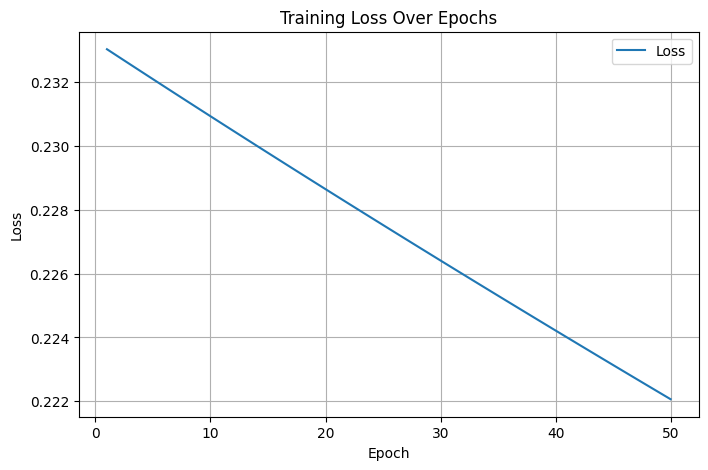

In [15]:
# 可视化损失变化曲线
plt.figure(figsize=(8, 5))
plt.plot(range(1, 51), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

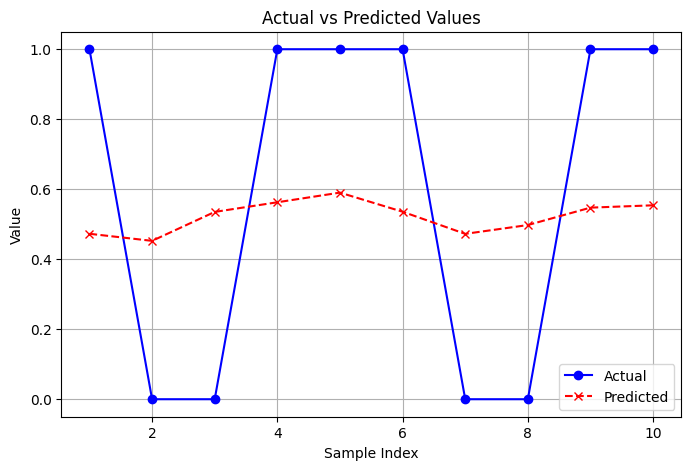

In [17]:
# 可视化预测结果与实际目标值对比
y_pred_final = model(x).detach().numpy()  # 最终预测值
y_actual = y.numpy()  # 实际值

plt.figure(figsize=(8, 5))
plt.plot(range(1, batch_size + 1), y_actual, 'o-', label='Actual', color='blue')
plt.plot(range(1, batch_size + 1), y_pred_final, 'x--', label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()